# VGG-16(Visual Geometry Group -16)

In [1]:
!git clone "https://github.com/NeenuFrancis/apple_Vs_Orange_DataSet.git"

Cloning into 'apple_Vs_Orange_DataSet'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 411 (delta 13), reused 100 (delta 0), pack-reused 268
Receiving objects: 100% (411/411), 76.88 MiB | 32.34 MiB/s, done.
Resolving deltas: 100% (13/13), done.


### Importing the libraries

In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

import tensorflow as tf

In [3]:
tf.__version__

'2.14.0'


## Part 1 - Data Preprocessing

###**Create an object for training and testing data.**

### Preprocessing the Training set

In [4]:
import pandas as pd

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/apple_Vs_Orange_DataSet/data/train',
                                                 target_size = (224, 224))

Found 196 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/apple_Vs_Orange_DataSet/data/test',
                                            target_size = (224, 224))

Found 124 images belonging to 2 classes.


## Part 2 - Building the VGG model

### Initialising the model

In [7]:
vgg = Sequential()

### Step 1 - Convolution

2 x convolution layer of 64 channel of 3x3 kernel and same padding.

In [8]:
vgg.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

vgg.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

### Step 2 - Pooling

1 x maxpool layer of 2x2 pool size and stride 2x2.

In [9]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

### Adding convolutional layer

2 x convolution layer of 128 channel of 3x3 kernel and same padding.

In [10]:
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

### Adding pooling layer



In [11]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))





### Adding a convolutional layer

2 x convolution layer of 256 channel of 3x3 kernel and same padding.

In [12]:
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))


### Adding pooling layer


In [13]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


### Adding a convolutional layer

2 x convolution layer of 512 channel of 3x3 kernel and same padding.

In [14]:
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


### Adding pooling layer


In [15]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


### Adding a convolutional layer

2 x convolution layer of 512 channel of 3x3 kernel and same padding.

In [16]:
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


### Adding pooling layer


In [17]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

### Step 3 - Flattening

In [18]:
vgg.add(Flatten())


### Step 4 - Full Connection

Pass  the data to the dense layer

In [19]:
vgg.add(Dense(units=4096,activation="relu"))
vgg.add(Dense(units=4096,activation="relu"))


### Step 5 - Output Layer






In [20]:
vgg.add(Dense(units=2, activation="softmax"))

## Part 3 - Training the model

### Compiling the model

In [21]:
vgg.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

### Training the model on the Training set and evaluating it on the Test set

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')



In [24]:
vgg.fit(steps_per_epoch=10,x=training_set, validation_data = test_set, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
 7/10 [====================>.........] - ETA: 2:56 - loss: 0.9986 - accuracy: 0.5000

10/10 [==============================] - 516s 48s/step - loss: 0.9986 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5403


## Part 4 - Making a single prediction


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.models import load_model


test_image = image.load_img('/content/apple_Vs_Orange_DataSet/data_to_predict/apple.jpg',
                            target_size = (224, 224))
img = np.asarray(test_image)


test_image = np.expand_dims(test_image, axis = 0)

result = vgg.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] ==1:
  prediction = ' Orange'
else:
  prediction = 'Apple'


1/1 [==============================] - 1s 1s/step
[[9.9999952e-01 4.3372648e-07]]


Apple


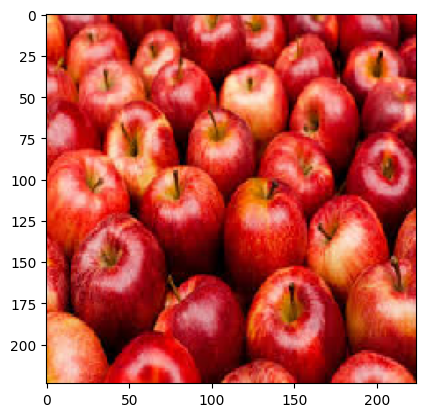

In [31]:
plt.imshow(img)

print(prediction)